In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/EN-online/main/discrete_distributions.ipynb

--2023-05-05 20:22:18--  https://raw.githubusercontent.com/marsgr6/EN-online/main/discrete_distributions.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260213 (254K) [text/plain]
Saving to: ‘discrete_distributions.ipynb’

discrete_distributi 100%[===================>] 254.11K  --.-KB/s    in 0.004s  

2023-05-05 20:22:18 (55.7 MB/s) - ‘discrete_distributions.ipynb’ saved [260213/260213]



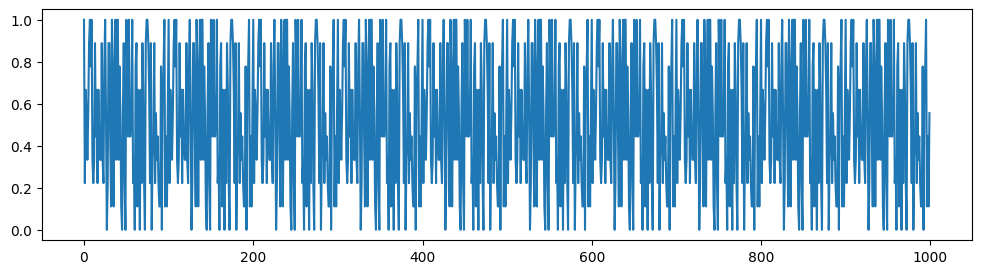

In [ ]:
# Importamos los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.ndimage.filters import uniform_filter1d

import datetime

# Store the first 1000 digits of pi
pi = (
    "14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989"
)

# Use the first 100 digits for the random number sequence
pi = pi[:100]
pi[:10]

# Generate seed
seed = int(str(dt.datetime.now().microsecond)[:2])
seed = 4
# Try the same seed
# Sequence size
size = 1000

seq = [int(pi[seed])]

for i in range(size-1):
    seed += 1
    seq += [int(pi[seed])]
    if seed >= len(pi)-1:
        seed = -1

plt.figure(figsize=(12,3))
plt.plot(np.array(seq)/9)

(array([ 43, 143]), 151)

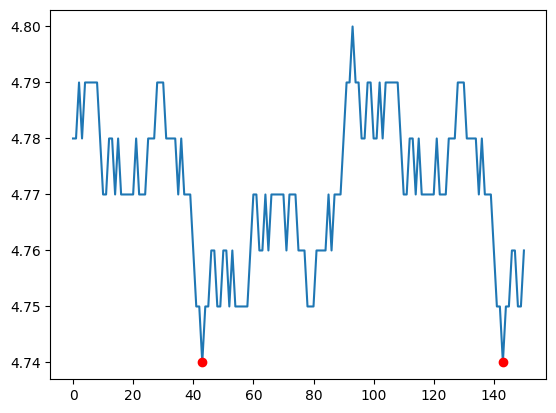

In [ ]:
# Program to calculate moving average
arr = seq.copy()
window_size = 850
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array to consider
# every window of size 3
while i < len(arr) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
moving_averages = np.array(moving_averages)
minimos = np.where(moving_averages == moving_averages.min())[0]
plt.plot(moving_averages)
plt.plot(minimos, moving_averages[minimos], 'or')
minimos, len(moving_averages)

1000

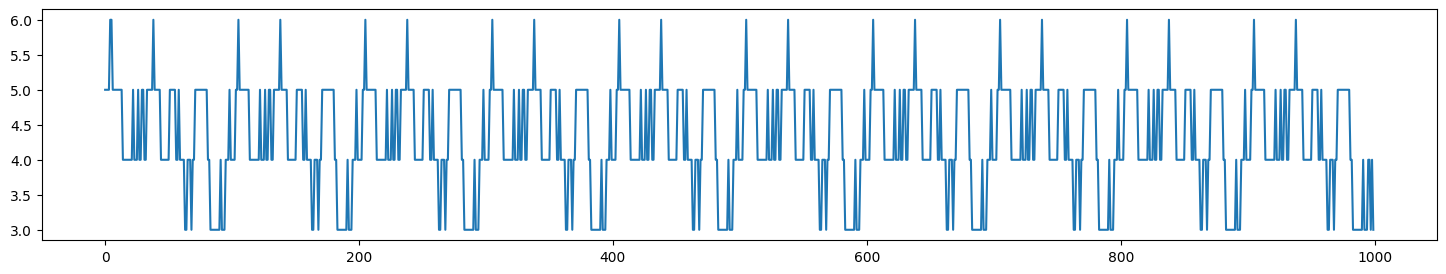

In [ ]:
plt.figure(figsize=(18,3))
avg_data = uniform_filter1d(seq, size=10)
plt.plot(avg_data)
len(avg_data)

### Linear congruential generator

- Try to implement a linear congruential generator (LCG): 
  - See: https://drive.google.com/file/d/0B-dmEvN59Z2Zd3REcHJEdldicTQ/view

- LCG: $X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

  - $a$: multiplier
  - $c$: increment
  - $m$: modulus
  - $X_0$: seed

**LCG Theorem:**

1. $m$ and $c$ are relatively prime
2. $a-1$ is divisible by every prime factor of $m$
3. If $m$ is a multiple of 4, then $a-1$ is a multiple of $4$.

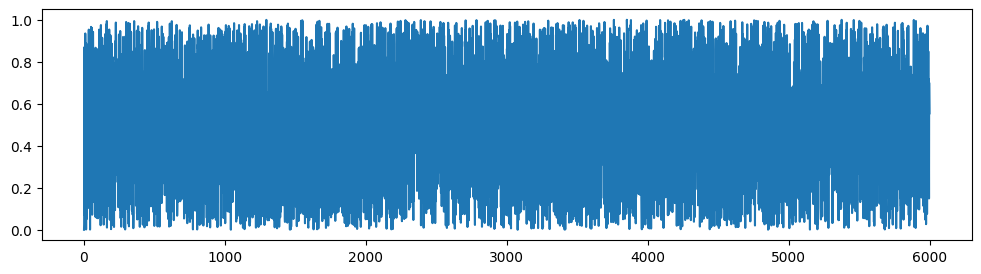

In [ ]:
seed = 4

seq = [seed]

size = 6000

m = 2**32
a = 1103515245 
c = 12345

for i in range(size-1):
    seq += [(seq[-1]*a + c) % m]

plt.figure(figsize=(12,3))

plt.plot(np.array(seq)/(m-1))

array([0])

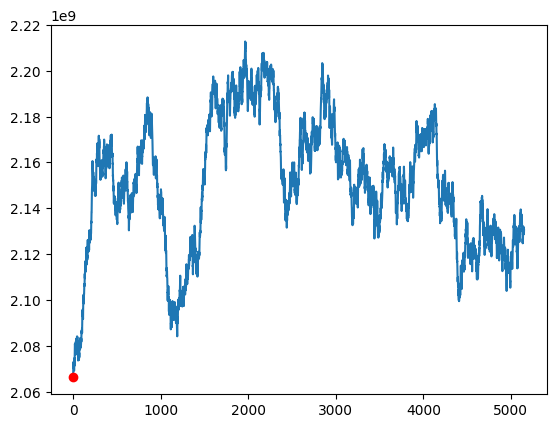

In [ ]:
# Program to calculate moving average
arr = seq.copy()
window_size = 850
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array to consider
# every window of size 3
while i < len(arr) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
  
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
moving_averages = np.array(moving_averages)
minimos = np.where(moving_averages == moving_averages.min())[0]
plt.plot(moving_averages)
plt.plot(minimos, moving_averages[minimos], 'or')
minimos

- Implement the birhtday problem: https://en.wikipedia.org/wiki/Birthday_problem

In [ ]:
# code 
sims = 10000

reps = []
for si in range(sims):
    cumples = [int(np.random.random()*365) for i in range(16)]
    c, f = np.unique(cumples, return_counts=True)
    reps += [len(np.where(f > 1)[0])]
reps = np.array(reps)
len(np.where(reps)[0]) / sims

0.2866


- What is the probability of getting 5 heads out of 10 coin tosses?
- What is the probability of getting 50 heads out of 100 coin tosses?
  - **Same probability or not?**

In [ ]:
# code 
sims = 10000
m10 = [(np.random.random(size=10)*2).astype('int').sum() for i in range(sims)]
m100 = [(np.random.random(size=100)*2).astype('int').sum() for i in range(sims)]

In [ ]:
len(np.where(np.array(m10) == 5)[0]) / sims

0.2496

In [ ]:
len(np.where(np.array(m100) == 50)[0]) / sims

0.0819

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>